In [ ]:
import pandas as pd
import numpy as np
from narwhals.stable.v1 import Datetime
from pandas import DateOffset

In [ ]:
# till now
# Timestamp
pd.Timestamp('6th aug 2025 8:10')

# DatetimeIndex -> df and series index
pd.DatetimeIndex([
    pd.Timestamp('6th aug 2025 8:10'),
    pd.Timestamp('7th aug 2025 8:10'),
    pd.Timestamp('8th aug 2025 8:10')
])[0]

# date_range()
pd.date_range(start= '2025/8/6', end='2025/8/20', freq='2D')

# to_datetime()
s = pd.Series(['2025/8/6','2025/8/7','2025/8/8'])
s   # but here s is object type

In [ ]:
s = pd.to_datetime(s)   # converts to datetimeindex
s.dt.day_name()   # day name of each date

## Timedelta
- Represents a duration, the difference between two dates or times.
- Can be created using `pd.Timedelta`, `pd.to_timedelta`, or by performing arithmetic operations on `Timestamp` or `DatetimeIndex` objects.
- Supports various units such as days, hours, minutes, seconds, and milliseconds.
- Useful for date arithmetic, such as adding or subtracting time from a date.
- Can be used in time series analysis to represent time intervals.

In [ ]:
# using Timestamp : subtraction of two timestamps
t1 = pd.Timestamp('2025/8/6 8:10')
t2 = pd.Timestamp('2025/8/7 10:15')
print(t2 - t1)
print(t1 - t2)

In [ ]:
# using Timedelta
pd.Timedelta('1 days 2 hours 5 minutes')

In [ ]:
# Arithmetic operations
t1 + pd.Timedelta('2 days 3 hours')

In [ ]:
pd.date_range(start='2025/8/6', periods=10, freq='D')

In [ ]:
 pd.date_range(start='2025/8/6', periods=10, freq='D') + pd.Timedelta('2 days 3 hours')

In [ ]:
# Example
temp = pd.read_csv("../DataSets/supply_chain_resilience_dataset.csv")
temp

In [ ]:
temp2 = temp[['Order_ID' , 'Dispatch_Date']].copy()     # to avoid SettingWithCopyWarning , use copy() to create a new dataframe .
temp2

In [ ]:
temp = temp[['Order_Date' , 'Delivery_Date']]
temp

In [ ]:
temp.shape

In [ ]:
temp.info()

In [1]:
# since both columns are object type , we need to convert them to datetime type
temp['Order_Date'] = pd.to_datetime(temp['Order_Date'])
temp['Delivery_Date'] = pd.to_datetime(temp['Delivery_Date'])

NameError: name 'pd' is not defined

In [ ]:
temp.info()

In [ ]:
temp['Time_Taken'] = temp['Delivery_Date'] - temp['Order_Date']   # gives Timedelta

In [ ]:
temp

In [ ]:
temp['Time_Taken'].mean()

# Time Series

A **time series** is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic (or other domain) variable changes over time.

### Examples

- **Financial Data** (company stocks)
- **Natural Data** (rainfall measurement)
- **Event Data** (COVID cases, etc.)
- **Medical Data** (heart rate monitoring)

### Types of Operations on Time Series

- **Time Series Analysis**
- **Time Series Forecasting**

In [ ]:
google = pd.read_csv('../DataSets/GOOGL.csv')
google.head()

In [ ]:
temp1 = pd.read_csv("../DataSets/supply_chain_resilience_dataset.csv")
temp1 = temp1[['Order_Date', 'Quantity_Ordered' , 'Order_Value_USD']]
temp1

In [ ]:
temp1.info()

In [ ]:
temp1['Order_Date'] = pd.to_datetime(temp1['Order_Date'])
temp1.info()

In [ ]:
temp1.set_index('Order_Date',inplace=True)
temp1.head()

In [ ]:
google.info()

In [ ]:
google['Date'] = pd.to_datetime(google['Date'])
google.info()

In [ ]:
google.set_index('Date',inplace=True)
google.head()

- Fetch a specific date

In [ ]:
temp1.loc['2023-10-24']

In [ ]:
google.loc['2020-10-23']

- Partial Indexing (only year or year-month)

In [ ]:
temp1.sort_index(inplace=True)   # sorting index is important for time series data
temp1

In [ ]:
temp1.loc['2023-01']

In [ ]:
temp1.loc['2023']

- create a new column for month name , day name , weekday, etc.

In [ ]:
temp1['Month'] = temp1.index.month_name()
temp1['Day'] = temp1.index.day_name()
temp1['Quarter'] = temp1.index.quarter

In [ ]:
temp1.head()

In [ ]:
google['Month'] = google.index.month_name()
google['Day'] = google.index.day_name()
google['Quarter'] = google.index.quarter

In [ ]:
google

- Slicing :
    - it is possible because the index is sorted and it is datetime type .

In [ ]:
temp1['2023-01-10':'2023-01-15']

In [ ]:
temp1['2023-01-10':'2023-01-15' : 3]

In [ ]:
# Challenge : fetch data for every 8th day of each month in 2023
temp1['2023-01-01':'2023-12-31'][temp1.index.day == 8]

In [ ]:
# Challenge : fetch data for every 8th day of each month in 2023

google[(google.index.day == 8) & (google.index.month == 7)]

# or

google[google.index.isin(pd.date_range(start='2005-07-08', end='2022-07-8', freq = pd.DateOffset(years = 1))) ]

In [ ]:
# Challenge : fetch data for last day of each month in 2023
temp1['2023-01-01':'2023-12-31'][temp1.index.is_month_end]

In [ ]:
# vizualization of a single column .
google['Close'].plot()

In [ ]:
# vizualization of multiple columns
subset_temp1 = temp1[['Quantity_Ordered' , 'Order_Value_USD']]
ax = subset_temp1.plot(
    subplots=True,
    layout=(3, 2),
    sharex=False,
    sharey=False,
    linewidth=0.7,
    fontsize=10,
    legend=False,
    figsize=(20, 15),
    title=['Quantity_Ordered','Order_Value_USD']
)

In [ ]:
# vizualization of multiple columns
sub_google = google[['Close', 'Low' , 'High']]
ax = sub_google.plot(
    subplots=True,
    layout=(3, 2),
    sharex=False,
    sharey=False,
    linewidth=0.7,
    fontsize=10,
    legend=False,
    figsize=(20, 15),
    title=['Close','Low' , 'High']
)

In [ ]:
# plot for a specific year or month
google.loc['2022']['Close'].plot()

In [ ]:
# frequency
temp1.index     # It has none frequency
google.index    # It has none frequency

In [ ]:
# asfreq : convert the series to the specified frequency
x = google.asfreq('D')  # daily frequency
x.index
# so now all the dates are present not only the trading dates but the values are NaN for non trading dates .

In [ ]:
google = google.asfreq('B')   # business day frequency
google.index

In [ ]:
google.asfreq('QS')

In [ ]:
google.asfreq('YE')

In [ ]:
google.asfreq('6h' , method='ffill')   # forward fill

In [ ]:
temp1

In [ ]:
# monthly trend of Quantity_Ordered
temp1.groupby('Month')['Quantity_Ordered'].sum().plot(kind='bar')

In [ ]:
# daily trend of Quantity_Ordered
temp1.groupby('Day')['Quantity_Ordered'].sum().plot(kind='bar')

In [ ]:
google.groupby('Month')['Close'].mean().plot(kind='bar')

## Resampling

Resampling involves changing the frequency of your time series observations , it is used to observe data at different time intervals than the original observations.

Two types of resampling are:

**Upsampling:** Increasing the frequency of the samples (e.g., from minutes to seconds).

**Downsampling:** Decreasing the frequency of the samples (e.g., from days to months).

### Downsampling :
- it is used to reduce the data size and to observe long term trends , by reducing noise .
- generally downsampling is done by aggregation functions like mean , sum , etc.
- used more often than upsampling .

In [ ]:
google['Close'].plot()
google['Close'].resample('QE').mean().plot()

### upsampling  :
- it is used to increase the data size and to observe short term trends , by increasing noise .
- generally upsampling is done by interpolation methods like forward fill , backward fill , linear interpolation , etc.

In [ ]:
google['Close'].plot()
google['Close'].resample('h').interpolate(method='linear').plot()

## Rolling Window (Smoothing)

- Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages, is a useful technique for smoothing time series data.
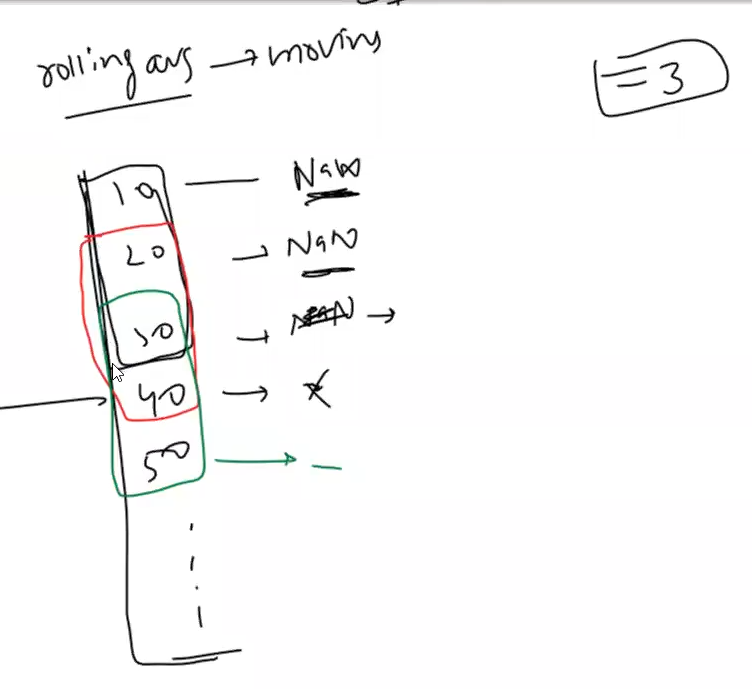   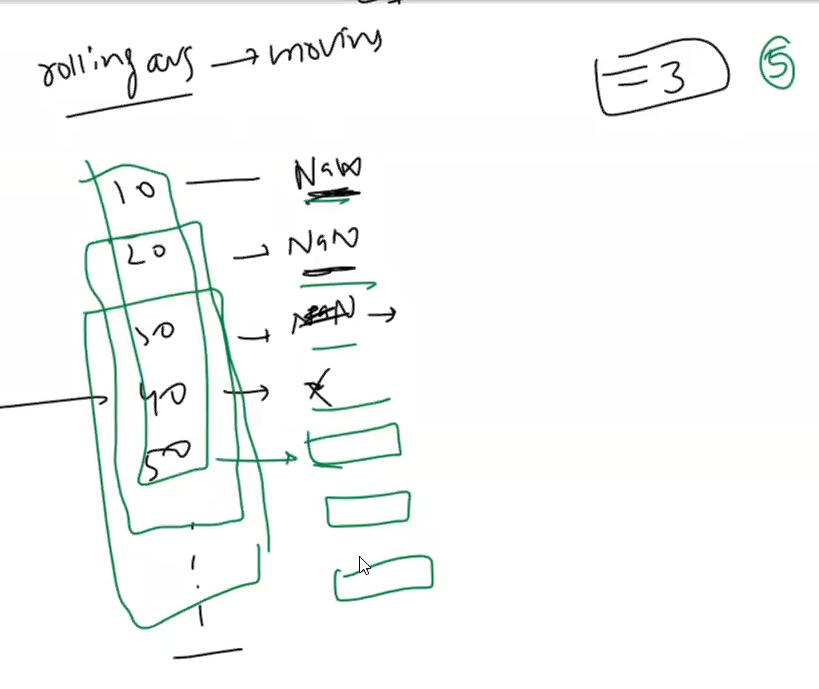

In [ ]:
import matplotlib.pyplot as plt

ax = google['Close'].rolling(20).mean().plot(label='Rolling Mean')
google['Close'].ewm(20).mean().plot(ax=ax, label='Exponential Weighted Mean')
plt.legend()
plt.show()
# here ewm -> exponential weighted mean : gives more weightage to recent values than older values

### Shifting
- Shifting is a technique used to move data points in a time series forward or backward by a specified number of periods.
- It is often used to create lagged features for time series analysis or to compare current values with past values.
- Shifting can help identify trends, seasonality, and other patterns in the data.

In [ ]:
google['Close']

In [ ]:
google['Close'].shift(3)   # shift down by 3

In [ ]:
google['Close'].shift(-4)   # shift up by 5

In [ ]:
df = pd.read_csv('../DataSets/login.csv' , header=None)
df = df[[1,2]]
df.rename(columns={1:'Username', 2:'Login_Time'}, inplace=True)

In [ ]:
df.head()

Q : find avg login time of user who logged in max times ?

In [ ]:
df['Username'].value_counts()

In [ ]:
max_user = df[df['Username'] == 413 ].copy()
max_user.head()

In [ ]:
max_user['Login_Time'] = pd.to_datetime(max_user['Login_Time'])
max_user.info()

In [ ]:
max_user['Shifted'] = max_user['Login_Time'].shift(1)
max_user.head()

In [ ]:
(max_user['Login_Time'] - max_user['Shifted']).mean()